# Pitt Band Bikers Final Project 
### Adam Funk, Brian Lindsay, Ryan O'Boyle

Welcome to the Pitt Band Bikers final Big Ideas project! The goal of our project was to analyze data to investigate what town was the best town to bike in throughout Alleghany County. Let's import our libraries and get into the data!

### Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Air Quality in Pittsburgh
#### Ryan O'Boyle

### Introduction
Air quality is a sneakily important category in considering the best town for biking in Pittsburgh. Air quality can have a drastic affect on the quality of ride a biker has. Especially factoring in the possibility of asthma, ensuring proper circulation throughout the body is extremely important. Biking in a place with the best possible air quality will help ensure the best performance and best time riding your bike

### The Metric
For my metric, I specifically averaged out the index value of the air quality on a day-to-day scale. Polling this information allows you to analyze the best city to bike throughout Pittsburgh. Through this, I was able to calculate a hierarchy for the best places in terms of bikers health throughout Pittsburgh

### Importing our DataSet

In [3]:
air = pd.read_csv("daily-air-quality.csv", index_col="date", parse_dates=True)
air.head(10)

,site,parameter,index_value,description,health_advisory,health_effects
date,,,,,,
2016-01-01,Lawrenceville,PM25B,25,Good,NaN,NaN
2016-01-01,Flag Plaza,CO,0,Good,NaN,NaN
2016-01-01,Harrison Township,OZONE,31,Good,NaN,NaN
2016-01-01,Avalon,SO2,10,Good,NaN,NaN
2016-01-01,Lincoln,PM25,35,Good,NaN,NaN
2016-01-01,Lincoln,PM10,11,Good,NaN,NaN
2016-01-01,South Fayette,SO2,3,Good,NaN,NaN
2016-01-01,North Braddock,PM10B,12,Good,NaN,NaN
2016-01-01,Parkway East,CO,4,Good,NaN,NaN


### Manipulating our Data
Now, we want to look at this data specifically focusing on our index_value. To start with this, we will take a look at all average `index_value`'s for every town.

In [4]:
sorted = air.groupby("site")["index_value"].describe()
sorted.sort_values(by='mean', inplace=True)
sorted.head(50)

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
Lawrenceville 2,4528.0,3.116166,2.444475,0.0,2.0,3.0,4.0,30.0
West Mifflin,301.0,6.335548,7.178930,0.0,1.0,4.0,9.0,44.0
Clairton,329.0,7.273556,10.464717,0.0,1.0,3.0,9.0,69.0
Flag Plaza,4002.0,9.949275,10.078134,0.0,0.0,8.0,16.0,57.0
Glassport High Street,2272.0,17.089349,10.364575,2.0,9.0,15.0,22.0,82.0
North Braddock,4882.0,18.011061,15.623459,0.0,4.0,16.0,28.0,114.0
Liberty,2285.0,18.686652,19.607663,0.0,3.0,13.0,27.0,137.0
South Fayette,4406.0,20.471403,20.725906,0.0,1.0,9.0,38.0,118.0
Avalon,3843.0,21.316419,21.709257,0.0,0.0,19.0,38.0,115.0


### Interpretations
Lets look down on our initial towns to narrow down what we are looking for, by eliminating our top objects.
* Lawrenceville 2 dictates that there are other parts of Lawrenceville with differing air quality, and we see on the bottom of this list that Lawrenceville with the worst air quality. This discrepancy removes Lawrenceville from contention 
* West Mifflin and Clairton have much too small of a data set, with their `count` field only adding up to 300

This makes Flag Plaza the best town to bike based off of air quality!

## Data Skewness 

We want to further analyze this data to ensure skewness within our datasets, as we want to check the validity of our data. Lets look at the list of sensors that our data set runs

In [5]:
air_sensors = pd.read_csv("air-quality-sensors.csv", index_col="site_name", parse_dates=True)
enabled_mask = air_sensors['enabled'] == 't'
air_sensors[enabled_mask]

,description,air_now_mnemonic,address,latitude,longitude,enabled
site_name,,,,,,
Harrison Township,Harrison Township Ozone and NO/NOx Site,HT1,Highlands Senior High School - 1500 Pacific Av...,40.613864,-79.729569,t
South Fayette,South Fayette Ozone Site,SF1,South Fayette Elementary School - 3640 Old Oak...,40.375647,-80.169931,t
Lawrenceville,"Lawrenceville Ozone, and Met Site",LV1,Allegheny County Health Department - 301 39th ...,40.465433,-79.960742,t
Liberty,Liberty Borough South Allegheny High School Site,NaN,South Allegheny High School - 2743 Washington ...,40.323856,-79.868064,t
Avalon,Avalon PM-2.5 Site,NaN,"520 Orchard Street Pittsburgh, PA 15202",40.499789,-80.071347,t
Lawrenceville 2,LV2 NCORE site,NaN,Allegheny County Health Department - 01 39th S...,40.465433,-79.960742,t
North Braddock,PM-10 BAM Site,NaN,North Braddock Borough Building - 600 Anderson...,40.402267,-79.860942,t
Clairton,Clairton PM-2.5 Site,NaN,Clairton Educational Center - 501 Waddel Stree...,40.294381,-79.885303,t
Parkway East,Near Road CO and NO2 Monitor,NaN,Hosanna House Event Center - 400 Sherwood Road...,40.437431,-79.863572,t


So this is worrying. While we do have a subtantial amount of data from these locations, we only have 12 actively collecting sensors, collecting from a very minimal amount of locations. This is an extraordinarily small amount of data to collect from, making this dataset redundant in the analysis of all 3 of our datasets. While Flag Plaza is the best town to bike in based off of air quality in this data set, there is not enough data to make a true final conclusion.

## Traffic Count Data Set

##### Adam Funk

**Purpose:** The purpose of the Jupyter Notebook is to visualize data from the Traffic Count Data Set retrieved from WPRDC. I intend to identify any trends from this data set and use this to further our argument on which neighborhood is the best environment for biking in Pittsburgh. With this data set, it is important to consider that this is an amalgamation of various traffic studies - including intersection studies, speed hump studies, Biking PGH studies just to name a few. The concentration of efforts in certain neighborhoods may skew results; however, no concentration was noted by the data set.

### Read in CSV File

Let's read in our csv file containing our data and use the head function to get an idea of how our data set is organized.

In [6]:
data = pd.read_csv("traffic_count.csv")

In [7]:
data.head()

,id,device_id,record_oid,count_start_date,count_end_date,average_daily_car_traffic,average_daily_bike_traffic,counter_number,counter_type,speed_limit,...,longitude,latitude,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone
0,1011743669,85,1.445865e+09,2019-04-18,2019-04-26,4949.0,NaN,6,StatTrak,25.0,...,-79.967772,40.455733,Polish Hill,7.0,6.0,42003060500,6.0,6.0,2.0,2-6
1,1026101993,140,1.121444e+09,2019-01-24,NaN,NaN,NaN,NaN,Intersection Study,NaN,...,-79.952249,40.466157,Central Lawrenceville,7.0,9.0,42003090200,2.0,9.0,2.0,3-6
2,1032382575,11,1.539893e+09,2018-08-28,2018-09-04,NaN,NaN,NaN,NaN,35.0,...,-80.076469,40.460717,Windgap,2.0,28.0,42003563000,5.0,28.0,6.0,1-16
3,103627606,9,7.341951e+08,2018-07-17,2018-08-01,2741.0,NaN,NaN,StatTrak,25.0,...,-79.914335,40.437379,Squirrel Hill South,5.0,14.0,42003140800,3.0,14.0,4.0,2-18
4,1039546167,144,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-80.019211,40.490794,Perry North,1.0,26.0,42003260200,1.0,26.0,1.0,1-15


### Average Daily Car Traffic

Let's filter a subset of the data to look at neighborhoods and average daily car traffic (dropping NaN values).

In [8]:
data_car_neighbor = data[["average_daily_car_traffic", "neighborhood"]].dropna()

In our data set, it appears that we have multiple occurrences of some neighborhoods. Let's use the groupby() function and lambda function to set these average car traffic counts by neighborhood.

In [9]:
group_data = data_car_neighbor.groupby("neighborhood").agg(lambda x: x.tolist())

Let's iterate through our data frame and total up the average car traffic measures for each neighborhood.

In [10]:
my_list = []
for index, row in group_data.iterrows():
    my_list.append(sum(row["average_daily_car_traffic"]))

Finally, let's create a new column with these total car traffic values in our data frame.

In [11]:
group_data.insert(1, "total_car_traffic", my_list)

In [12]:
display(group_data)

,average_daily_car_traffic,total_car_traffic
neighborhood,,
Allegheny Center,[2386.0],2386.0
Allegheny West,[477.0],477.0
Arlington,"[2224.0, 2347.0]",4571.0
Beechview,"[2046.0, 763.0, 1446.0]",4255.0
Beltzhoover,[1577.0],1577.0
...,...,...
Summer Hill,[937.0],937.0
Upper Hill,"[1530.0, 927.0, 403.0]",2860.0
West Oakland,[2585.0],2585.0


We will now use a bar plot to visualize the total car traffic by neighborhood.

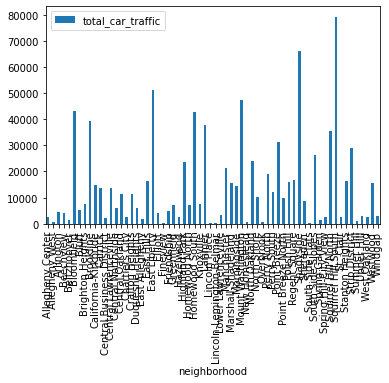

In [13]:
group_data.plot(kind = "bar")

It's nice to have a visualization of the total car traffic throughout neighborhoods in Pittsburgh, but what if we could just pull the neighborhood with the least total car traffic?

In [14]:
print(group_data[group_data.total_car_traffic == group_data.total_car_traffic.min()])

                 average_daily_car_traffic  total_car_traffic
neighborhood                                                 
South Side Flats                   [115.0]              115.0


The code above says that South Side Flats has the least amount of total car traffic. That's helpful information but what if we could look at the top 5 neighborhoods with least total car traffic?

In [15]:
group_data.sort_values("total_car_traffic").head(5)

,average_daily_car_traffic,total_car_traffic
neighborhood,,
South Side Flats,[115.0],115.0
Lincoln Place,[126.0],126.0
Lincoln-Lemington-Belmar,[195.0],195.0
Fineview,[419.0],419.0
Allegheny West,[477.0],477.0


Above we have displayed the top 5 neighborhoods with the lowest total car traffic. While this is certainly useful information, what else can we learn from this dataset? Let's look at what columns our data set contains.

In [16]:
data.columns

Index(['id', 'device_id', 'record_oid', 'count_start_date', 'count_end_date',
       'average_daily_car_traffic', 'average_daily_bike_traffic',
       'counter_number', 'counter_type', 'speed_limit', 'max_speed',
       'median_speed', 'percent_over_limit', 'speed85_percent',
       'speed95_percent', 'longitude', 'latitude', 'neighborhood',
       'council_district', 'ward', 'tract', 'public_works_division',
       'pli_division', 'police_zone', 'fire_zone'],
      dtype='object')

It looks like we have 2 additional columns that may be of use to us - average daily bike traffic and percent over the speed limit. The more daily bike traffic indicates others bike in that neighborhood frequently - indicating it is a safe environment. Additionally, the higher the percent of drivers over the speed limit increases the liklihood for car accidents which can endanger bikers. First, let's consider the average daily bike traffic. 

### Average Daily Bike Traffic

In [17]:
bike_neighbor_data = data[["average_daily_bike_traffic", "neighborhood"]].dropna()

Considering the daily bike traffic, let's group by neighborhood and see how much bike traffic data has been recorded.

In [18]:
bike_data = bike_neighbor_data.groupby("neighborhood").agg(lambda x: x.tolist())

In [19]:
display(bike_data)

,average_daily_bike_traffic
neighborhood,
Central Oakland,[198.0]
North Oakland,"[88.0, 102.0]"
South Oakland,"[2063.0, 1278.0]"
South Side Flats,"[954.0, 892.0]"


Looking at the dataset above, it seems that there is very little data concerning bike traffic. However, we can still look at the data we have available regarding bike traffic and calculate total bike traffic.

In [20]:
bike_totals = []
for index, row in bike_data.iterrows():
    bike_totals.append(sum(row["average_daily_bike_traffic"]))

In [21]:
bike_data.insert(1, "total_bike_traffic", bike_totals)

In [22]:
display(bike_data)

,average_daily_bike_traffic,total_bike_traffic
neighborhood,,
Central Oakland,[198.0],198.0
North Oakland,"[88.0, 102.0]",190.0
South Oakland,"[2063.0, 1278.0]",3341.0
South Side Flats,"[954.0, 892.0]",1846.0


Let's use another bar chart to visualize the total bike traffic by neighborhood.

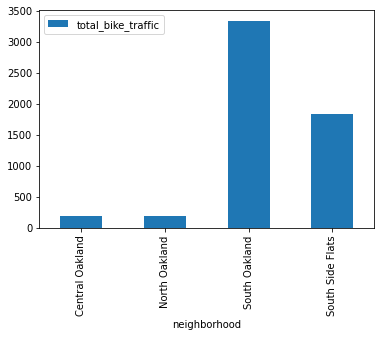

In [23]:
bike_data.plot(kind = "bar")

From the bar chart above, it is clear that South Oakland has the most bike traffic; however, South Side Flats - the neighborhood identified with the lowest total car traffic has a comparable amount of bike traffic.

In [24]:
bike_data.sort_values("total_bike_traffic", ascending = False)

,average_daily_bike_traffic,total_bike_traffic
neighborhood,,
South Oakland,"[2063.0, 1278.0]",3341.0
South Side Flats,"[954.0, 892.0]",1846.0
Central Oakland,[198.0],198.0
North Oakland,"[88.0, 102.0]",190.0


After sorting out data by total bike traffic, it becomes clear that **South Oakland** has the most bike traffic and **South Side Flats** has the second most bike traffic of the data collected.

### Percent Over Speed Limit

Finally, let's consider the percent over speed limit parameter of this data set. This can indicate how safe the resulting neighborhood is for biking by indicating how many drivers exceed the local speed limits. 

In [25]:
speed_limit_neighborhood_data = data[["percent_over_limit", "neighborhood"]].dropna()

In [26]:
speed_limit_neighborhood_data

,percent_over_limit,neighborhood
0,77.0,Polish Hill
2,28.0,Windgap
3,70.0,Squirrel Hill South
5,2.0,Central Northside
7,58.0,Polish Hill
...,...,...
407,13.0,Homewood South
408,17.0,Homewood South
410,29.0,Bloomfield
411,10.0,Bloomfield


Again, let's group together repeating neighborhoods using the `groupby` function.

In [27]:
speed_limit_data = speed_limit_neighborhood_data.groupby("neighborhood").agg(lambda x: x.tolist())

In [28]:
speed_limit_data

,percent_over_limit
neighborhood,
Allegheny Center,[65.0]
Allegheny West,[11.0]
Arlington,"[73.0, 50.0]"
Beechview,"[85.0, 20.0, 72.0]"
Bloomfield,"[17.0, 14.0, 14.0, 91.0, 15.0, 8.0, 23.0, 29.0..."
...,...
Summer Hill,[55.0]
Upper Hill,"[15.0, 0.0, 58.0]"
West Oakland,[28.0]


Now that we have grouped repeated neighborhoods into a list, lets find the average percent over the speed limit for each neighborhood. We can use the mean function from the numpy package we imported above. 

In [29]:
speed_totals = []
for index, row in speed_limit_data.iterrows():
    speed_totals.append(np.mean(row["percent_over_limit"]))

In [30]:
speed_limit_data.insert(1, "average_percent_over_limit", speed_totals)

In [31]:
display(speed_limit_data)

,percent_over_limit,average_percent_over_limit
neighborhood,,
Allegheny Center,[65.0],65.000000
Allegheny West,[11.0],11.000000
Arlington,"[73.0, 50.0]",61.500000
Beechview,"[85.0, 20.0, 72.0]",59.000000
Bloomfield,"[17.0, 14.0, 14.0, 91.0, 15.0, 8.0, 23.0, 29.0...",24.555556
...,...,...
Summer Hill,[55.0],55.000000
Upper Hill,"[15.0, 0.0, 58.0]",24.333333
West Oakland,[28.0],28.000000


Let's make use of the bar graph plot to visualize what this average percent of people driving over the speed limit looks like.

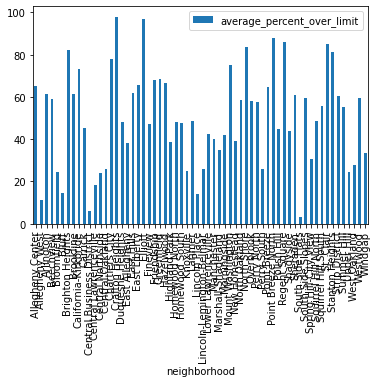

In [32]:
speed_limit_data.plot(kind = "bar")

Now, let's sort these values from low to high to identify the neighborhoods with the lowest percent of drivers exceeding the speed limit.

In [33]:
speed_limit_data.sort_values("average_percent_over_limit")

,percent_over_limit,average_percent_over_limit
neighborhood,,
South Side Flats,[3.0],3.000000
Central Business District,[6.0],6.000000
Allegheny West,[11.0],11.000000
Lincoln Place,[14.0],14.000000
Bluff,"[23.0, 9.0, 12.0]",14.666667
...,...,...
St. Clair,[85.0],85.000000
Regent Square,[86.0],86.000000
Point Breeze North,"[81.0, 95.0]",88.000000


After sorting these values, we see - for a third time - **South Side Flats** is a relevant neighborhood as this has the lowest percent of drivers exceeding the speed limits. However, **Lincoln Place** and **Allegheny West** are also relevant neighborhoods as well.

# Bike-Related Crashes

In [14]:
import pandas as pd
%matplotlib inline

In [29]:
crashData = pd.read_csv("514ae074-f42e-4bfb-8869-8d8c461dd824.csv", sep = ",")

In [30]:
crashData.sort_values("CRASH_CRN")

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,2020000005,11,2,2301,02301,2020,1,4,55.0,0.0,...,2.0,S,4,NaN,25.0,NaN,NaN,COMSTOCK WY,0,NaN
1,2020000014,11,2,2301,02301,2020,1,4,140.0,1.0,...,2.0,N,4,NaN,25.0,NaN,NaN,STANTON AV,0,NaN
2,2020000016,11,2,2301,02301,2020,1,4,53.0,0.0,...,2.0,S,2,0019,35.0,251.0,291.0,SAW MILL RUN BL,2,NaN
3,2020000020,11,2,2113,02113,2020,1,4,315.0,3.0,...,2.0,N,4,NaN,25.0,NaN,NaN,DATURA DR,0,NaN
4,2020000023,11,2,2301,02503,2020,1,4,152.0,1.0,...,4.0,S,4,NaN,25.0,NaN,NaN,COMMONWEALTH PL,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9858,2021017633,11,2,2116,02116,2020,10,7,1845.0,18.0,...,2.0,S,2,4003,45.0,17.0,2022.0,MCKNIGHT RD,1,NaN
9859,2021018779,11,2,2464,00000,2020,12,6,630.0,6.0,...,2.0,N,2,0028,65.0,374.0,3802.0,ALLEGHENY VALLEY EX,0,NaN
9860,2021019758,11,2,2301,02301,2020,12,4,1245.0,12.0,...,2.0,S,4,NaN,25.0,NaN,NaN,SENECA ST,1,NaN
9861,2021021042,11,2,2301,02301,2020,11,3,1830.0,18.0,...,2.0,N,4,NaN,25.0,NaN,NaN,FORD ST,0,NaN


In [31]:
pghQuery = crashData["MUNICIPALITY"] == 2301

In [20]:
pghCrashes = crashData[pghQuery]

In [21]:
pghCrashes

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
0,2020000005,11,2,2301,02301,2020,1,4,55.0,0.0,...,2.0,S,4,NaN,25.0,NaN,NaN,COMSTOCK WY,0,NaN
1,2020000014,11,2,2301,02301,2020,1,4,140.0,1.0,...,2.0,N,4,NaN,25.0,NaN,NaN,STANTON AV,0,NaN
2,2020000016,11,2,2301,02301,2020,1,4,53.0,0.0,...,2.0,S,2,0019,35.0,251.0,291.0,SAW MILL RUN BL,2,NaN
4,2020000023,11,2,2301,02503,2020,1,4,152.0,1.0,...,4.0,S,4,NaN,25.0,NaN,NaN,COMMONWEALTH PL,0,NaN
12,2020000188,11,2,2301,02301,2020,1,4,1621.0,16.0,...,2.0,E,4,NaN,NaN,NaN,NaN,EVA ST,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9855,2021016340,11,2,2301,00000,2020,11,3,2345.0,23.0,...,2.0,E,1,0376,55.0,684.0,2615.0,PENN LINCOLN PY,1,NaN
9857,2021016383,11,2,2301,00000,2020,11,2,1730.0,17.0,...,3.0,E,1,0376,55.0,740.0,1320.0,PENN LINCOLN PY,1,NaN
9860,2021019758,11,2,2301,02301,2020,12,4,1245.0,12.0,...,2.0,S,4,NaN,25.0,NaN,NaN,SENECA ST,1,NaN
9861,2021021042,11,2,2301,02301,2020,11,3,1830.0,18.0,...,2.0,N,4,NaN,25.0,NaN,NaN,FORD ST,0,NaN


In [56]:
bikeQuery = pghCrashes["BICYCLE"] > 0
pghBikeCrashes = pghCrashes[bikeQuery]
pghBikeCrashes

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,LANE_COUNT,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT
118,2020001985,11,2,2301,02301,2020,1,3,654.0,6.0,...,3.0,S,4,NaN,25.0,NaN,NaN,ALLEGHENY AV,1,NaN
191,2020003297,11,2,2301,02301,2020,1,5,1938.0,19.0,...,3.0,S,4,NaN,35.0,NaN,NaN,ATLANTIC AV,1,NaN
286,2020004543,11,2,2301,02301,2020,1,5,1400.0,14.0,...,1.0,S,4,NaN,25.0,NaN,NaN,GROSS ST,1,NaN
305,2020004782,11,2,2301,02301,2020,1,2,1355.0,13.0,...,2.0,S,4,NaN,25.0,NaN,NaN,BELLEFIELD AV,1,NaN
906,2020012534,11,2,2301,02301,2020,2,1,1649.0,16.0,...,2.0,S,4,NaN,25.0,NaN,NaN,SHAW AV,1,NaN
1259,2020016587,11,2,2301,02301,2020,2,4,1850.0,18.0,...,2.0,S,4,NaN,25.0,NaN,NaN,EDMOND ST,1,NaN
1500,2020019328,11,2,2301,02301,2020,2,5,2208.0,22.0,...,3.0,S,4,NaN,25.0,NaN,NaN,SHADY AV,1,NaN
1920,2020023876,11,2,2301,02301,2020,3,6,840.0,8.0,...,2.0,N,4,NaN,25.0,NaN,NaN,S BELLEFIELD AV,1,NaN
2053,2020025253,11,2,2301,02301,2020,2,4,2014.0,20.0,...,2.0,S,4,NaN,25.0,NaN,NaN,S NEGLEY AV,1,NaN
2497,2020030596,11,2,2301,02301,2020,4,4,1532.0,15.0,...,2.0,N,4,NaN,25.0,NaN,NaN,CENTRE AV,1,NaN


In [60]:
pghBikeCrashes2 = pghBikeCrashes[["CRASH_CRN","CRASH_MONTH","DAY_OF_WEEK","TIME_OF_DAY","LOCATION_TYPE","BICYCLE_COUNT","FATAL_COUNT","INJURY_COUNT","BICYCLE_DEATH_COUNT","BICYCLE_MAJ_INJ_COUNT","DEC_LAT","DEC_LONG","RDWY_SEQ_NUM","ADJ_RDWY_SEQ","ROAD_OWNER","STREET_NAME"]]
pghBikeCrashes2

,CRASH_CRN,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,LOCATION_TYPE,BICYCLE_COUNT,FATAL_COUNT,INJURY_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_MAJ_INJ_COUNT,DEC_LAT,DEC_LONG,RDWY_SEQ_NUM,ADJ_RDWY_SEQ,ROAD_OWNER,STREET_NAME
118,2020001985,1,3,654.0,0,1,0,1,0,0,40.4515,-80.0189,5,5,4,ALLEGHENY AV
191,2020003297,1,5,1938.0,0,1,0,1,0,1,40.4566,-79.9397,6,6,4,ATLANTIC AV
286,2020004543,1,5,1400.0,0,1,0,1,0,0,40.4647,-79.9442,3,4,4,GROSS ST
305,2020004782,1,2,1355.0,0,1,0,1,0,0,40.4481,-79.9526,3,3,4,BELLEFIELD AV
906,2020012534,2,1,1649.0,0,1,0,1,0,0,40.4357,-79.9098,3,4,4,SHAW AV
1259,2020016587,2,4,1850.0,0,1,0,1,0,0,40.4612,-79.9481,3,4,4,EDMOND ST
1500,2020019328,2,5,2208.0,0,1,0,1,0,0,40.4380,-79.9194,3,4,4,SHADY AV
1920,2020023876,3,6,840.0,0,1,0,1,0,0,40.4439,-79.9508,6,6,4,S BELLEFIELD AV
2053,2020025253,2,4,2014.0,0,1,0,1,0,1,40.4583,-79.9338,5,5,4,S NEGLEY AV
2497,2020030596,4,4,1532.0,0,1,0,1,0,0,40.4487,-79.9616,4,3,4,CENTRE AV


In [64]:
pghBikeCrashes2.sort_values("BICYCLE_MAJ_INJ_COUNT")

,CRASH_CRN,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,LOCATION_TYPE,BICYCLE_COUNT,FATAL_COUNT,INJURY_COUNT,BICYCLE_DEATH_COUNT,BICYCLE_MAJ_INJ_COUNT,DEC_LAT,DEC_LONG,RDWY_SEQ_NUM,ADJ_RDWY_SEQ,ROAD_OWNER,STREET_NAME
118,2020001985,1,3,654.0,0,1,0,1,0,0,40.4515,-80.0189,5,5,4,ALLEGHENY AV
7904,2020093891,10,5,1900.0,0,1,0,1,0,0,40.4687,-79.9159,3,3,4,STANTON AV
7595,2020090493,10,4,848.0,0,1,0,1,0,0,40.4514,-79.9454,4,3,4,DEVONSHIRE ST
6904,2020082310,10,2,1400.0,0,1,0,1,0,0,40.4403,-79.9656,4,3,4,ROBINSON ST
6034,2020072654,9,1,1244.0,0,1,0,1,0,0,40.4601,-79.9460,4,3,4,LIBERTY AV
5969,2020071961,9,5,1610.0,0,1,0,1,0,0,40.4366,-79.9555,3,4,4,MCKEE PL
5917,2020071336,9,3,2230.0,0,1,0,1,0,0,40.4509,-79.9431,3,4,4,ELLSWORTH AV
5805,2020070126,8,4,850.0,0,1,0,1,0,0,40.4511,-79.9358,3,4,4,PEMBROKE PL
4991,2020060867,7,6,1642.0,7,1,0,1,0,0,40.4310,-80.0017,6,6,4,E CARSON ST
4514,2020055062,7,2,1826.0,0,1,0,1,0,0,40.4376,-79.9135,3,3,4,BEECHWOOD BL


After manually finding neighborhoods of incident location from coordinates, the results are:
* Allegheny West - 1 
* South Side Flats - 1 
* Highland Park - 1 
* South Shore - 1 
* East Hills - 1 
* Brighton Heights - 1 
* Strip District - 1 
* Terrace Village - 1 
* Sheraden - 1 (major)
* Friendship - 1 (major)
* Shadyside - 3
* Bloomfield 4 , 1 major
* Squirrel Hill South - 3, North - 1
* Oakland North - 2, Central - 1, West - 1

<AxesSubplot:>

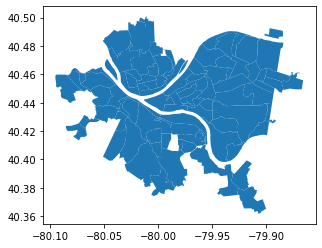

In [ ]:
import geopandas
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()